## Lead Scoring Case Study

### Problem Statement

An education company named X Education gets a lot of leads, however, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify hot leads or potential leads, so that they can focus more on such leads and increase the lead conversion rate.

### Goal of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Approach: Perform the following steps to assign a lead score and identify potential leads:
1. Reading and understanding the data.
2. EDA - Univariate analysis, Handling missing values, Outlier Treatment, Bivariate analysis.
3. Data Preparation.
4. Test-Train Split.
5. Feature Scaling.
6. Building the logistic regression model.
7. Metrics.
8. ROC Curve.
9. Finding the optimal cutoff point.

## Step 1: Reading and Understanding the Data

Let us first import the necessary libraries and read the Leads dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [99]:
#Font for graph labels, this is used for all graphs in this notebook
label_font = {"fontsize": 15, 
              "color" : "darkred",
             'weight': 'normal'}
#Font for graph title, this is used for all graphs in this notebook
title_font = {"fontsize": 15, 
              "color" : "darkred",
             'weight': 'normal'}

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
# Importing the dataset
df = pd.read_csv("leads.csv")

In [5]:
# Check the head of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Checking the dimensions of the dataframe
df.shape

(9240, 37)

In [7]:
#checking for type of each column and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All the datatypes are inferred correctly. We shall work with each feature to analyze and do feature engineering if required. We see there are some missing values which can be analyzed and treated.

## Step 2: EDA

### Checking columns with missing values

In [8]:
#Missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

There are 11 features with more than 25% of data missing, `Lead Quality` being the highest with 52%. We also notice a word ‘select’ in some of the features. This could be because the lead has not selected a value in the dropdown on the website (or elsewhere). The word select is not giving us any useful information and will be treated as missing value. 

There are four columns with the value 'Select' - `Specialization, How did you hear about X Education, Lead Profile, City`

In [9]:
#Treating 'Select' as missing
df = df.replace('Select', np.nan)

In [10]:
#Recalculating number of missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

The percentage of missing values has increased significantly
-	Specialization: 16% -> 37%
-	How did you hear about X Education: 24% -> 78%
-	Lead Profile: 29% -> 74%
-	City: 15% -> 40%

In [11]:
#Dropping columns with large number of missing values
df.drop(["How did you hear about X Education", "Lead Profile"],axis=1,inplace=True)
len(df.columns)

35

Lead Quality is the column with next highest missing values, but it seems to be an important feature to be dropped. We can analyze it further before acting on th emissing values. The data dictionary describes Lead quality as "Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead."

In [12]:
#Understanding lead quality
df['Lead Quality'].value_counts(dropna = False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [13]:
#Percantage of conversions with lead quality missing
(df.loc[df['Lead Quality'].isnull()].groupby('Converted').count()/df['Lead Quality'].isnull().sum()*100)[['Prospect ID']]

,Prospect ID
Converted,
0,78.518985
1,21.481015


In [14]:
#Percantage of conversions with lead quality Not Sure
(df.loc[df['Lead Quality']== "Not Sure"].groupby('Converted').count()/df['Lead Quality'].value_counts()['Not Sure']*100)[['Prospect ID']]

,Prospect ID
Converted,
0,75.641026
1,24.358974


Good percentage of leads with `missing Lead Quality` were converted successfully, a similar percentage of `Not Sure Lead Quality` were also converted successfully. Since the values of this column are filled with human intuition and because of the similarity of conversion numbers between missing and "Not Sure", one of the approaches to treat the missing values is to replace it with value "Not Sure"

In [15]:
#Imputing Lead Quality value to be Not Sure
df['Lead Quality'].fillna('Not Sure', inplace = True)
df['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

The columns with next highest missing values
- Asymmetrique Activity Index                      46.0
- Asymmetrique Profile Index                       46.0
- Asymmetrique Activity Score                      46.0
- Asymmetrique Profile Score                       46.0

The first thing noticeable here is, we have redundant information, scores seem to be derived from index columns or vice versa. So, we should be able to drop one of the pairs.

##### TODO: Understand these columns better to impute the values, or drop the columns

In [16]:
#Analysing if there is a pattern in missing values
df.groupby('Asymmetrique Profile Index').describe()[["Asymmetrique Activity Score", "Asymmetrique Profile Score"]]

Asymmetrique Activity Score                       \
                                                 count       mean       std   
Asymmetrique Profile Index                                                    
01.High                                         2203.0  14.059010  1.188487   
02.Medium                                       2788.0  14.502152  1.494517   
03.Low                                            31.0  14.258065  1.611785   

                                                         \
                            min   25%   50%   75%   max   
Asymmetrique Profile Index                                
01.High                     7.0  13.0  14.0  15.0  17.0   
02.Medium                   8.0  14.0  14.0  15.0  18.0   
03.Low                      9.0  13.5  15.0  15.0  16.0   

                           Asymmetrique Profile Score                       \
                                                count       mean       std   
Asymmetrique Profile Index                                                   
01.High                                        2203.0  18.128007  0.957760   
02.Medium                                      2788.0  14.987446  0.767234   
03.Low                                           31.0  11.709677  0.461414   

                                                          
                             min   25%   50%   75%   max  
Asymmetrique Profile Index                                
01.High                     17.0  17.0  18.0  19.0  20.0  
02.Medium                   13.0  15.0  15.0  15.0  16.0  
03.Low                      11.0  11.0  12.0  12.0  12.0

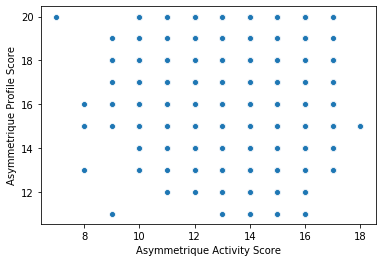

In [17]:
sns.scatterplot(x = "Asymmetrique Activity Score", y="Asymmetrique Profile Score", data = df)
plt.show()

Seems like there is no specific pattern with how the score is derived from index or between the activity and profile scores!
So it is hard to impute values that makes business sense.


In [18]:
#Dropping columns 
df.drop(["Asymmetrique Activity Index", "Asymmetrique Profile Index","Asymmetrique Activity Score",
         "Asymmetrique Profile Score"],axis=1,inplace=True)
len(df.columns)

31

In [19]:
#Recalculating number of missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

Next highest is `City`

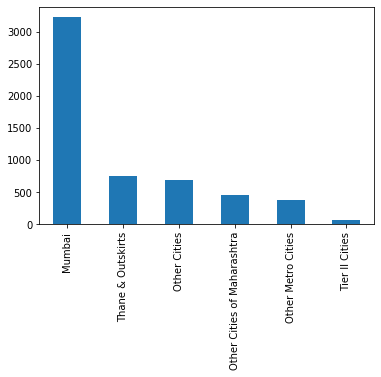

In [20]:
df['City'].value_counts().plot.bar()
plt.show()

'Mumbai' appears most frequently. We can check the feasibility of replacing the missing values with the mode. Also, an interesting thing to note here is majority of this data is from the state 'Maharashtra'

In [21]:
#Imputing missing values for City as mode value
mumbai_df = df['City'].fillna('Mumbai')
mumbai_df.value_counts()/mumbai_df.value_counts().sum()*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


After imputing `City` city with mode value we can see 75% of the data is from Mumbai city and around 90% of the data is from Maharashtra. There is not much variance in this feature. So, imputing 40% of the values with the mode does not seem to be contributing towards the model because of lack of variance. Hence dropping this column.


In [22]:
#Dropping city 
df.drop(["City"],axis=1,inplace=True)
len(df.columns)

30

In [23]:
#Analysing Tags
df["Tags"].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Tags is described as 'Tags assigned to customers indicating the current status of the lead.' - It is a free text column filled by the sales agent calling. Again, like city column, imputing 36% of the values into mode value can adversely impact the model. Hence, we can bucket all the missing values into 'Unknown' category.

In [24]:
#Imputing Tags missing values
df["Tags"].fillna('Unknown', inplace = True)
df['Tags'].value_counts()['Unknown']

3353

In [25]:
#Analysing Tags
df["Specialization"].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Similar to `Tags`, missing values of `Specialization` can also be bucketed into 'Unknown' category.

In [26]:
#Imputing Specialization missing values
df["Specialization"].fillna('Unknown', inplace = True)
df['Specialization'].value_counts()['Unknown']

3380

In [27]:
#Recalculating number of missing values
round(df.isnull().sum()/len(df.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [28]:
#Analysing What is your current occupation
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#When 'What is your current occupation' is null, "What matters most to you in choosing a course" is also null
df[df['What is your current occupation'].isnull()].groupby('What matters most to you in choosing a course').count()[['Prospect ID']] 

,Prospect ID
What matters most to you in choosing a course,


In [30]:
df["What matters most to you in choosing a course"].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

With the given information about data, reason for the missing values of `What is your current occupation` and `What matters most to you in choosing a course` is not evident. Looking at the values of `What matters most to you in choosing a course` column, we can see very less variance in data and considering the percentage of missing values we can drop this column. Whereas `What is your current occupation` see to have good variance, Hence, we the bucket the missing values as 'Unknown'

In [31]:
#Imputing What is your current occupation missing values
df["What is your current occupation"].fillna('Unknown', inplace = True)
df['What is your current occupation'].value_counts()['Unknown']

2690

In [32]:
df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)
len(df.columns)

29

In [33]:
#Analysing Country
df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Sweden                     3
Belgium                    2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
China                      2
Italy                      2
Bangladesh                 2
Ghana                      2
Philippines                2
Indonesia                  1
Liberia                    1
Vietnam                    1
Malaysia                   1
Sri Lanka                  1
Russia        

In [34]:
#Percentage os data variance (India and missing value)
(df[(df['Country'].isnull()) | (df['Country'] == "India")].shape[0]/df.shape[0])*100

96.8939393939394

97% of the `Country` column is made-up of 'India' and missing value. Due to lack of variance we drop the column

In [35]:
#Drop country
df.drop(['Country'],axis=1,inplace=True)
len(df.columns)

28

In [36]:
#Coulmns after missing value treatment
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We are left with 28 columns

### Outlier analysis

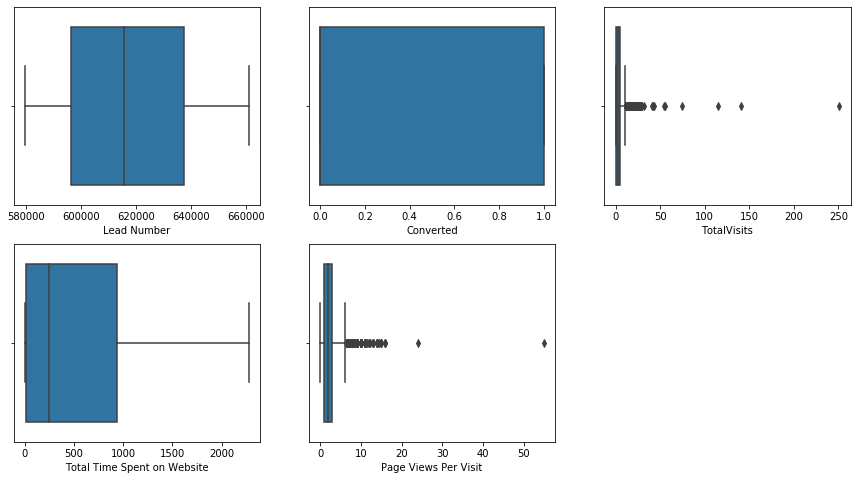

In [37]:
#Get all numeric columns
num_columns = df.select_dtypes(include=["int64", 'float64'])

#Boxplot of numeric columns
plt.figure(figsize=(15,8))
for i, col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
    
plt.show()
     

- `Lead number` and `Converted` look as expected
- `Total Time Spent on Website` do not have any outliers, however there are more number of datapoints above the median compared to the other end. There could be a trend here that can be used by the model.
- `TotalVisits` and `Page Views Per Visit` has outliers on the higher end. We can analyze these further and treat accordingly.

In [38]:
df["TotalVisits"].quantile([.25,.5,.70,.75,.80,.90,.95,.99,1])

0.25      1.0
0.50      3.0
0.70      4.0
0.75      5.0
0.80      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

We see a reasonable number up to 99 percentile. We can perform soft caping for treating outliers of `TotalVisits`

In [39]:
q3 = df["TotalVisits"].quantile(.99)
df[df["TotalVisits"] > q3]["TotalVisits"].value_counts()


18.0     15
20.0     12
19.0      9
21.0      6
23.0      6
24.0      5
25.0      5
27.0      5
22.0      3
28.0      2
26.0      2
29.0      2
32.0      1
74.0      1
141.0     1
55.0      1
41.0      1
30.0      1
43.0      1
54.0      1
115.0     1
251.0     1
42.0      1
Name: TotalVisits, dtype: int64

In [40]:
#Soft capping TotalVisits
df["TotalVisits"][df["TotalVisits"] > q3] = q3
df[df["TotalVisits"] > q3]["TotalVisits"].value_counts()

Series([], Name: TotalVisits, dtype: int64)

In [41]:
df["Page Views Per Visit"].quantile([.25,.5,.70,.75,.80,.90,.95,.99,1])

0.25     1.0
0.50     2.0
0.70     3.0
0.75     3.0
0.80     4.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

We see a similar trend with `Page Views Per Visit`, and soft capping can be used here also.

In [42]:
q3 = df["Page Views Per Visit"].quantile(.99)
df[df["Page Views Per Visit"] > q3]["Page Views Per Visit"].value_counts()

10.00    25
11.00    18
14.00     9
13.00     6
12.00     5
15.00     4
16.00     3
12.33     1
11.50     1
14.50     1
24.00     1
55.00     1
Name: Page Views Per Visit, dtype: int64

In [43]:
#Soft capping Page Views Per Visit
df["Page Views Per Visit"][df["Page Views Per Visit"] > q3] = q3
df[df["Page Views Per Visit"] > q3]["Page Views Per Visit"].value_counts()

Series([], Name: Page Views Per Visit, dtype: int64)

### Univariate and Bivariate analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [67]:
#Analysing prospect id and lead number
df[['Prospect ID', "Lead Number"]].head()

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681


Prospect ID and Lead Number are unique numbers assigned to each lead. This is not useful for the model we will build. Hence dropping them.

In [69]:
df.drop(['Prospect ID', "Lead Number"], inplace = True, axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [86]:
#Get all categorical columns
categorical_cols = df.select_dtypes(include= ['object']).columns.values.tolist()
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

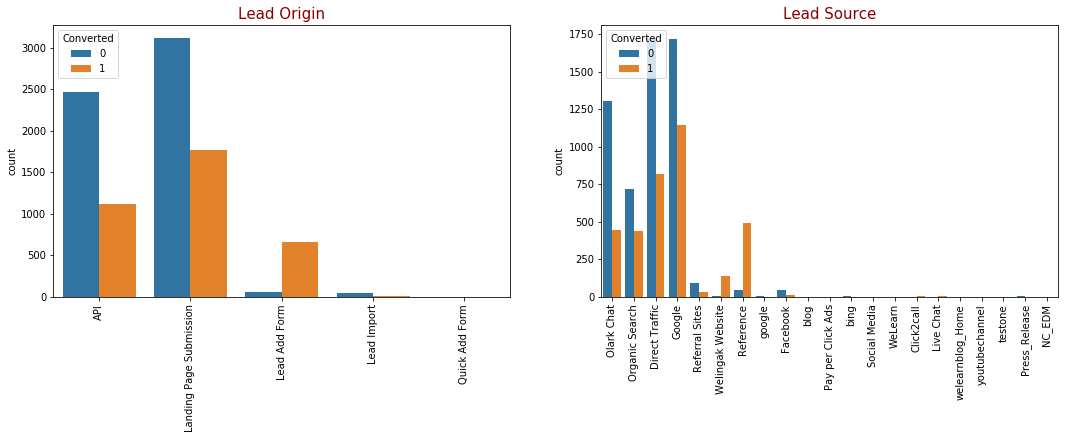

In [146]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[0:2]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()


**Inference**
- Lead Origin: More number of leads are originated from landing page submission
- Lead Source: Major percentage of lead source is Google and direct traffic


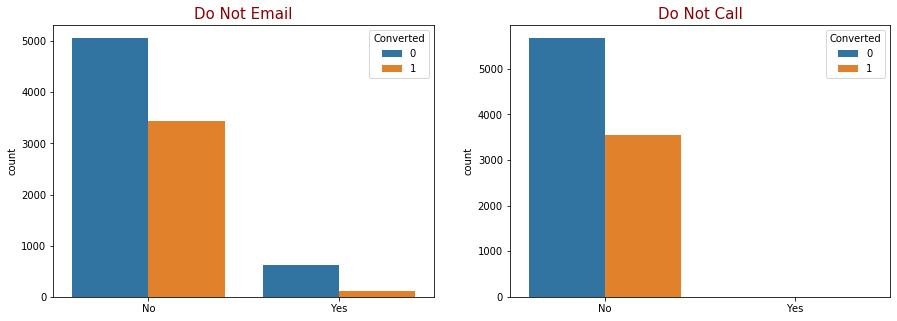

In [125]:
#Count plots
plt.figure(figsize=(15,5))
for i, col in enumerate(categorical_cols[2:4]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')
    
plt.show()

In [124]:
print((df["Do Not Email"].value_counts(dropna = False)/df.shape[0])*100)
print((df["Do Not Call"].value_counts(dropna = False)/df.shape[0])*100)

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64


**Inference**
What we note here is, very less variance in data. Both, `Do Not Email` and `Do Not Call` can be dropped because of lack of variance.

In [126]:
#Drop Do Not Call and Do Not Email
df.drop(["Do Not Call", "Do Not Email"], inplace = True, axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

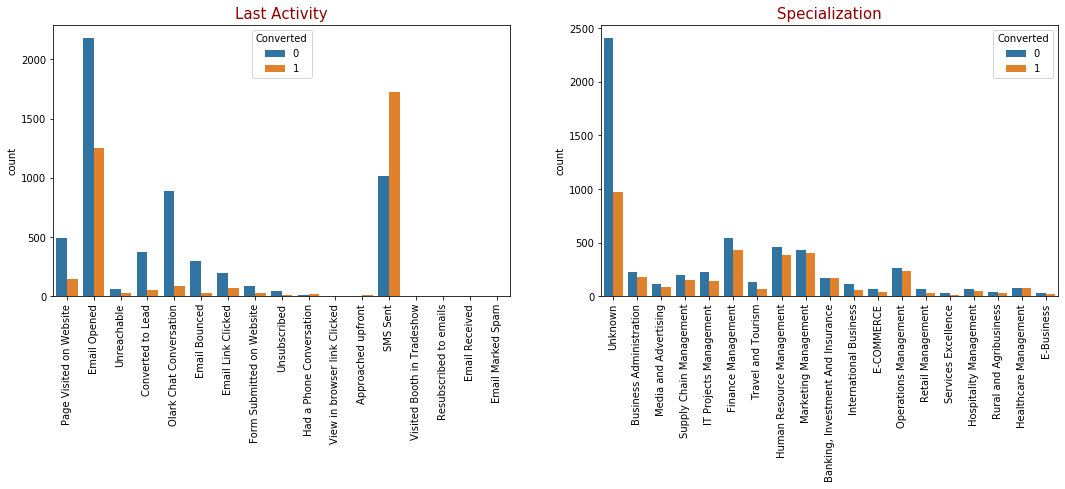

In [134]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[4:6]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

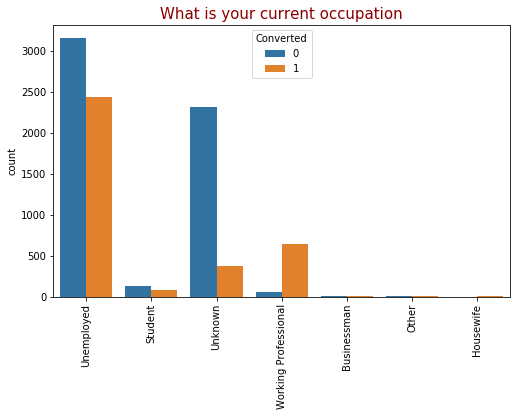

In [133]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[6:7]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

In [135]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

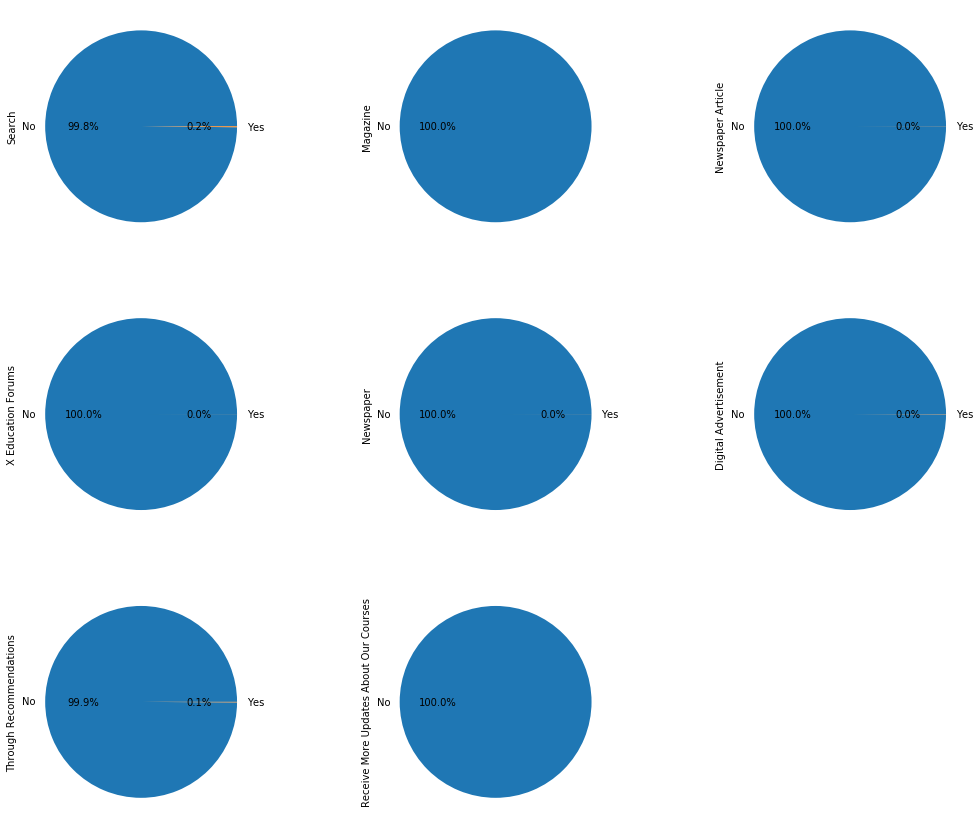

In [141]:
plt.figure(figsize=(18,15))
for i, col in enumerate (categorical_cols[7:15]):
    plt.subplot(3,3,i+1)
    #plt.title('Pie Plot for {}'.format(col))
    df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

All 8 columns are not useful!!!

##### todo: Should we drop them?!!!

In [148]:
df.drop(categorical_cols[7:15], inplace = True, axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

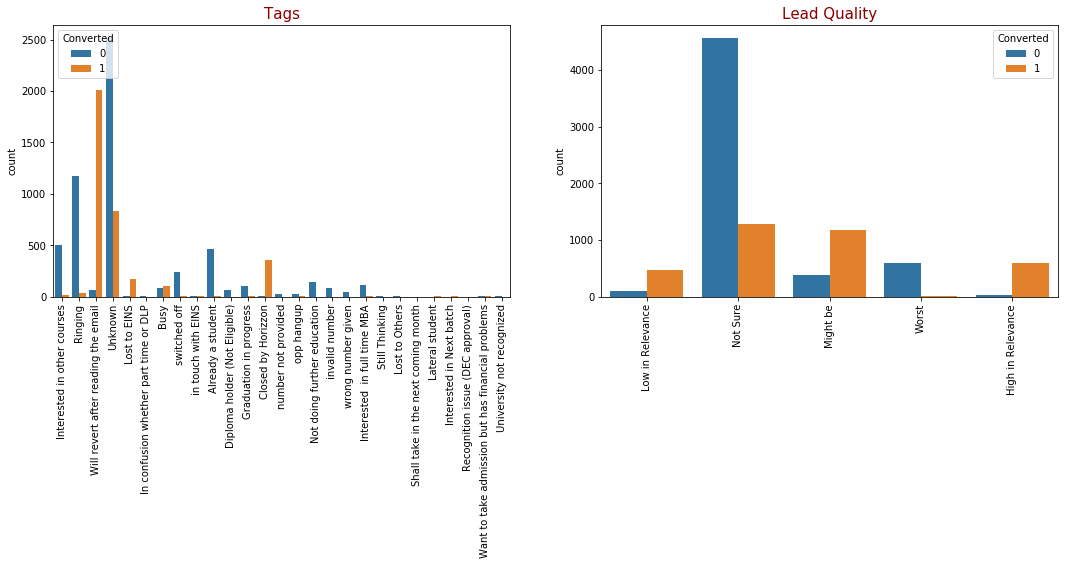

In [143]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[15:17]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

Good variance

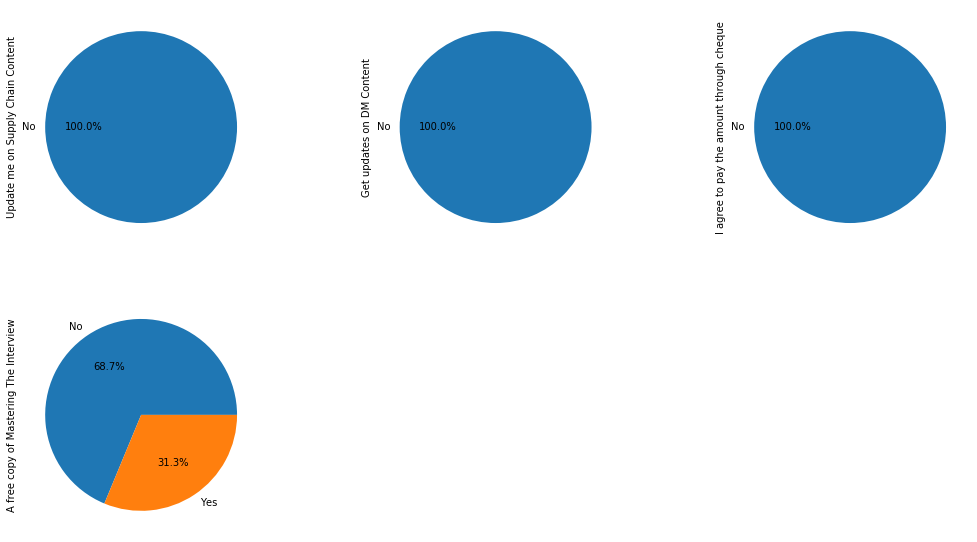

In [144]:
plt.figure(figsize=(18,15))
for i, col in enumerate (categorical_cols[17:21]):
    plt.subplot(3,3,i+1)
    #plt.title('Pie Plot for {}'.format(col))
    df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

First three are potential candidates to be dropped

In [149]:
df.drop(categorical_cols[17:20], inplace = True, axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

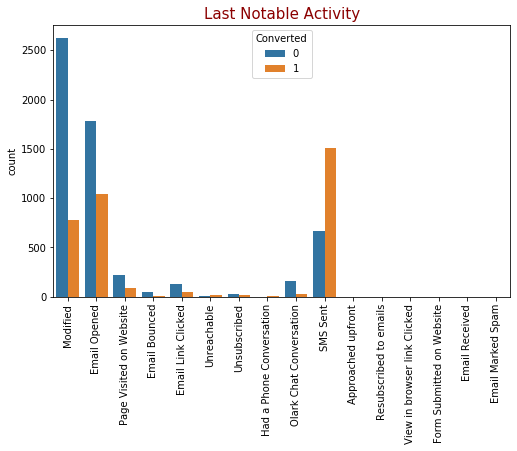

In [145]:
#Analysing 'Lead Origin' and 'Lead Source'
plt.figure(figsize=(18,5))
for i, col in enumerate(categorical_cols[21:22]):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.title(col ,fontdict = title_font)
    plt.xlabel('')

plt.show()

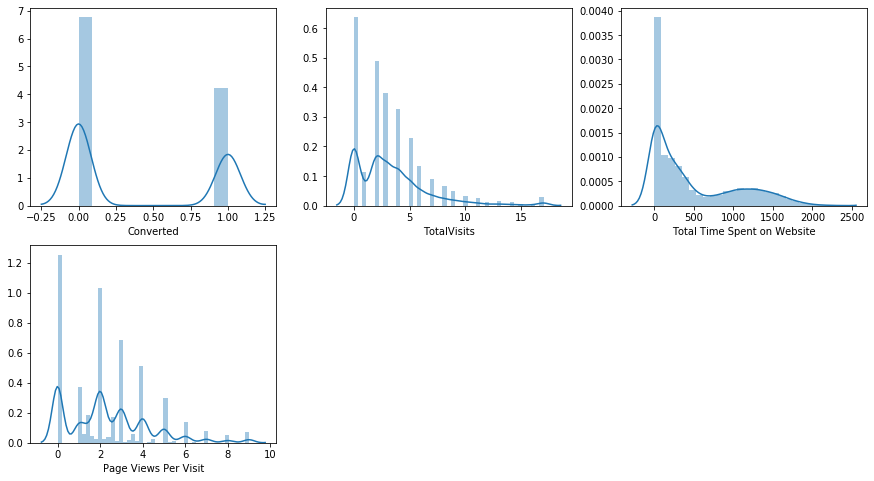

In [147]:
#Get all numeric columns
num_columns = df.select_dtypes(include=["int64", 'float64'])

#Distplot of numeric columns
plt.figure(figsize=(15,8))
for i, col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
    
plt.show()

All have good variance

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  Lead Quality                            9240 non-null   obje

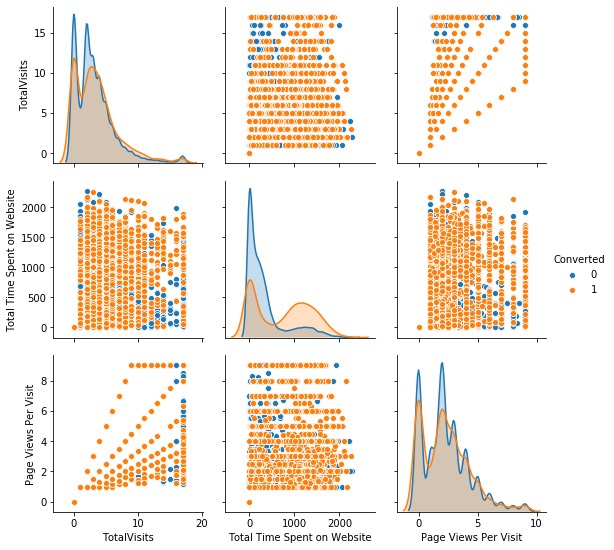

In [156]:
sns.pairplot(df, hue = 'Converted')
plt.show()

- Page Views per Visit and TotalVisits seem to have a strong correlation

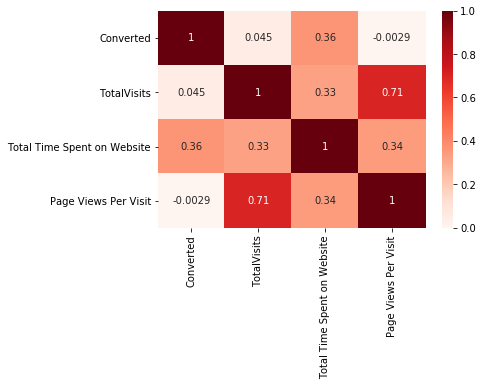

In [161]:
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.show()

## Step 3: Data Preparation

- Converting categorical binary variables (Yes/No) to 0/1.
- Creating dummy variables for categorical variables with multiple levels.

In [162]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Not Sure,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [163]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [164]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Not Sure,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [165]:
# Creating a dummy variable for categorical variables and dropping the first one.
dummies = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
                            'Tags', 'Lead Quality','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummies], axis=1)

In [166]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Sear

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 122 entries, Lead Origin to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(3), object(8), uint8(109)
memory usage: 1.9+ MB


In [ ]:
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
                            'Tags', 'Lead Quality','Last Notable Activity'], inplace = True, )